<a href="https://colab.research.google.com/github/mssamoilenko/PythonAnalytic/blob/main/AnalLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
data = {
    'ПІБ': ['Іванов Іван Іванович', 'Петров Петро Петрович', 'Сидорова Марія Василівна',
            'Коваленко Олександр Сергійович', 'Мельник Наталія Ігорівна',
            'Шевченко Тарас Григорович', 'Бойко Андрій Вікторович',
            'Ткаченко Юлія Олександрівна', 'Савченко Михайло Іванович',
            'Поліщук Анна Володимирівна'],
    'Дата народження': ['1985-03-15', '1990-07-22', '1982-11-05', '1995-02-28',
                         '1988-09-17', '1979-04-30', '1992-12-10', '1987-06-25',
                         '1980-08-12', '1993-05-20'],
    'Посадовий оклад': [15000, 18000, 22000, 12000, 19000, 25000, 16000, 21000, 23000, 17000],
    'Стаж': [15, 8, 20, 3, 12, 25, 7, 13, 22, 6],
    'Відпрацьовано днів': [20, 22, 20, 18, 20, 20, 21, 20, 20, 19]
}

df = pd.DataFrame(data)

In [4]:
df['Дата народження'] = pd.to_datetime(df['Дата народження'])

In [5]:
working_days_in_month = 20
df['Нарахована з/п'] = df['Посадовий оклад'] / working_days_in_month * df['Відпрацьовано днів']


In [6]:
df['Доплата за стаж'] = df['Посадовий оклад'] * df['Стаж'] * 0.001

In [7]:
df['Всього нараховано'] = df['Нарахована з/п'] + df['Доплата за стаж']

In [8]:
df['Податок'] = df['Всього нараховано'] * 0.195

In [9]:
df['До видачі'] = df['Всього нараховано'] - df['Податок']

In [10]:
# df.to_excel('розрахунок_заробітної_плати.xlsx', index=False)

In [11]:
full_month_employees = df[df['Відпрацьовано днів'] == working_days_in_month]
avg_salary_full_month = full_month_employees['До видачі'].mean()

In [12]:
employees_over_10_years = df[df['Стаж'] > 10].shape[0]

In [13]:
print(f"\nСтатистичні дані:")
print(f"Середня заробітна плата співробітників, які пропрацювали повний місяць: {avg_salary_full_month:.2f} грн")
print(f"Кількість співробітників зі стажем більше 10 років: {employees_over_10_years}")


Статистичні дані:
Середня заробітна плата співробітників, які пропрацювали повний місяць: 17079.01 грн
Кількість співробітників зі стажем більше 10 років: 6


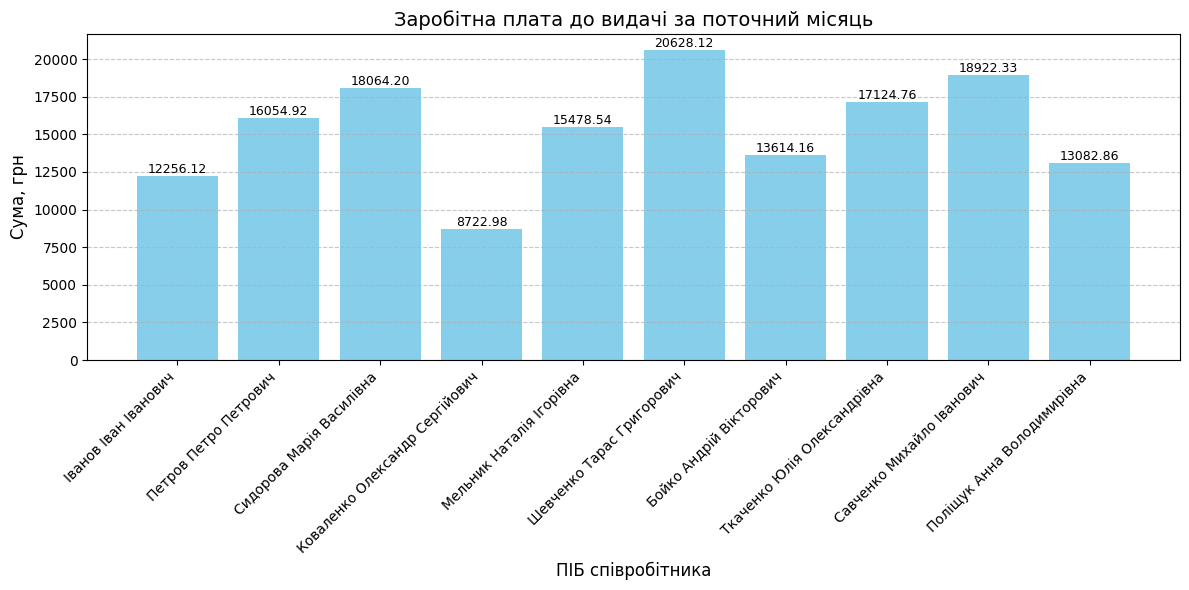


Розрахований DataFrame (перші 5 рядків):
                              ПІБ Дата народження  Посадовий оклад  Стаж  Відпрацьовано днів  Нарахована з/п  Доплата за стаж  Всього нараховано   Податок  До видачі
0            Іванов Іван Іванович      1985-03-15            15000    15                  20         15000.0            225.0            15225.0  2968.875  12256.125
1           Петров Петро Петрович      1990-07-22            18000     8                  22         19800.0            144.0            19944.0  3889.080  16054.920
2        Сидорова Марія Василівна      1982-11-05            22000    20                  20         22000.0            440.0            22440.0  4375.800  18064.200
3  Коваленко Олександр Сергійович      1995-02-28            12000     3                  18         10800.0             36.0            10836.0  2113.020   8722.980
4        Мельник Наталія Ігорівна      1988-09-17            19000    12                  20         19000.0            228.0   

In [15]:
plt.figure(figsize=(12, 6))
bars = plt.bar(df['ПІБ'], df['До видачі'], color='skyblue')
plt.title('Заробітна плата до видачі за поточний місяць', fontsize=14)
plt.xlabel('ПІБ співробітника', fontsize=12)
plt.ylabel('Сума, грн', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

if len(bars) > 0:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom', fontsize=9)
else:
    print("Увага: Немає даних для відображення на діаграмі")

plt.tight_layout()
plt.show()

print("\nРозрахований DataFrame (перші 5 рядків):")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df.head())